<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/Machine_data_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
import gdown

# file 주소
url='https://drive.google.com/uc?id=1kaBIw2ysl6PSG2FodSGeyQ--ZeJIkxib'
output='preprocess1.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kaBIw2ysl6PSG2FodSGeyQ--ZeJIkxib
To: /content/preprocess1.zip
100%|██████████| 181M/181M [00:00<00:00, 208MB/s]


'preprocess1.zip'

In [3]:
!mkdir dataset
!unzip /content/preprocess1.zip -d /content/dataset/

Archive:  /content/preprocess1.zip
  inflating: /content/dataset/data.npy  
  inflating: /content/dataset/label.npy  


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
data = np.load('./dataset/data.npy',allow_pickle=True) 
label = np.load('./dataset/label.npy',allow_pickle=True)

print("data:", data)
print(data.shape)

print("label:", label)
print(label.shape)

data: [[-0.693608   -0.57675467 -0.41649867 ...  0.335536    0.21200533
   0.10600267]
 [ 0.03945697  0.01068626  0.03205879 ... -0.17673434 -0.24414
  -0.26674556]
 [ 0.02921333 -0.21450933 -0.4382     ...  0.06426933 -0.085136
  -0.24205333]
 ...
 [-0.06416188  0.36011868  0.17380559 ... -0.13660794 -0.25680994
   0.20109469]
 [-0.07314182 -0.00534182  0.01643636 ...  0.11012364 -0.15326909
   0.20052364]
 [-0.06932902 -0.00857056  0.0228146  ...  0.01062267  0.01935418
  -0.01593401]]
(47970, 1024)
label: [5 5 5 ... 3 3 3]
(47970,)


In [5]:
import sklearn.preprocessing

# 자동으로 0과 1로 정규화
data_normalized = sklearn.preprocessing.minmax_scale(data,axis=1)

# 나중에 원본 데이터로 복원하기 위해 scaler를 저장할 필요가 있음
# scaler가 없으면 복원 못 함

# scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))
# scaler_fit = scaler.fit(data)
# import joblib
# scaler_filename = "scaler.save"
# joblib.dump(scaler_fit, scaler_filename)

print("normalized data:",data_normalized)
print(data_normalized.shape)

normalized data: [[0.46493872 0.47900342 0.49829214 ... 0.58880852 0.57394012 0.56118143]
 [0.47170566 0.45770846 0.46810638 ... 0.36652669 0.33373325 0.32273545]
 [0.55162333 0.50669334 0.46545622 ... 0.55808586 0.53054316 0.50161563]
 ...
 [0.5227758  0.70868327 0.62704626 ... 0.49103203 0.43836299 0.63900356]
 [0.38720988 0.4423109  0.46001002 ... 0.53614961 0.3220905  0.60961763]
 [0.17852793 0.44127371 0.57699669 ... 0.52427353 0.56203236 0.40943101]]
(47970, 1024)


In [6]:
data_normalized1=[]

# normalization 정규화를 이렇게 직접 할 수 도 있어요.
for i in data: 
    i_list = [(float(i[j])) for j in range(1024)]
    
    temp=[]
    mini=min(i_list)
    maxi=max(i_list)
    for k in i_list:
        temp.append((k-mini)/(maxi-mini))
    data_normalized1.append(temp)   

data_normalized1=np.array(data_normalized1)
print(data_normalized1)

print(data_normalized1.shape)

[[0.46493872 0.47900342 0.49829214 ... 0.58880852 0.57394012 0.56118143]
 [0.47170566 0.45770846 0.46810638 ... 0.36652669 0.33373325 0.32273545]
 [0.55162333 0.50669334 0.46545622 ... 0.55808586 0.53054316 0.50161563]
 ...
 [0.5227758  0.70868327 0.62704626 ... 0.49103203 0.43836299 0.63900356]
 [0.38720988 0.4423109  0.46001002 ... 0.53614961 0.3220905  0.60961763]
 [0.17852793 0.44127371 0.57699669 ... 0.52427353 0.56203236 0.40943101]]
(47970, 1024)


5


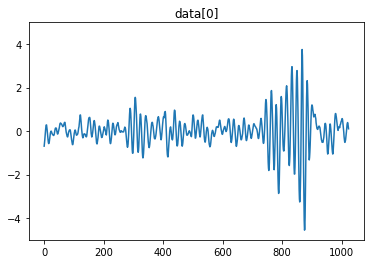

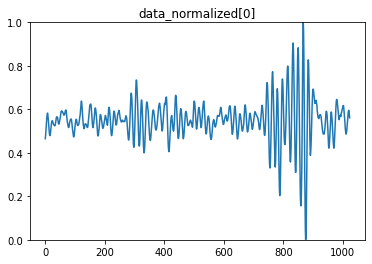

In [13]:
print(label[0])

# 원본 데이터(-5~5)
plt.plot(data[0])
plt.title('data[0]')
plt.ylim(-5,5)
plt.show()

# 정규화 후의 데이터(0~1)
plt.plot(data_normalized[0])
plt.title('data_normalized[0]')
plt.ylim(0,1)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# train 데이터와 test데이터 나누기
X_train, X_test, Y_train, Y_test = train_test_split(data_normalized,label,test_size=0.2,shuffle=False)

In [7]:
# train 데이터와 test데이터 나누기2

split_num = int(47970 * 0.8) # 35000

X_train = data_normalized[:split_num]
X_test = data_normalized[split_num:]
Y_train = label[:split_num]
Y_train = label[split_num:]

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)

(38376, 1024)
(9594, 1024)
(38376, 1024)
(9594,)


In [21]:
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.summary()

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기
# hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, verbose = 1)
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs=200, validation_split=0.2, verbose = 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 32)         

KeyboardInterrupt: ignored

300/300 - 1s - loss: 2.1205 - accuracy: 0.5321 - 674ms/epoch - 2ms/step
test loss: 2.1205177307128906
test accuracy: 0.532103419303894


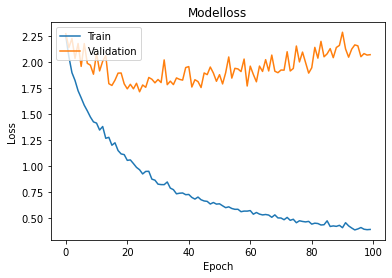

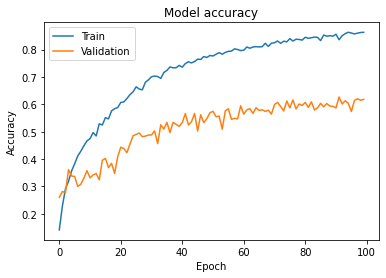

In [20]:
# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 플롯

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

n: 5345
1/1 [==============================] - 0s 26ms/step
predict:  [3]
True_value : 7


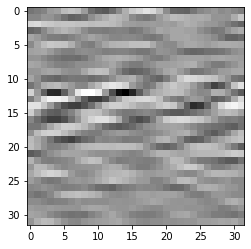

n: 6983
1/1 [==============================] - 0s 16ms/step
predict:  [2]
True_value : 2


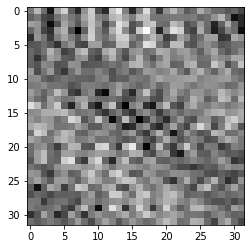

n: 2689
1/1 [==============================] - 0s 15ms/step
predict:  [7]
True_value : 7


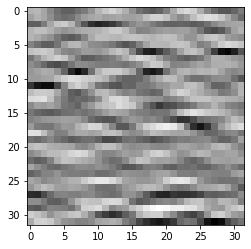

n: 2844
1/1 [==============================] - 0s 16ms/step
predict:  [8]
True_value : 7


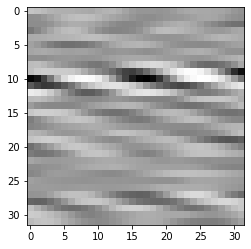

n: 7871
1/1 [==============================] - 0s 17ms/step
predict:  [5]
True_value : 5


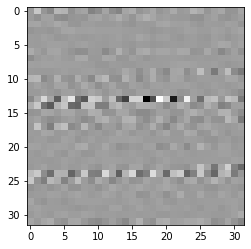

In [27]:
# prediction과 맞는지 비교

for i in range(5):
  n = int(np.random.rand()*9594)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,32,32,1)),axis=1))
  print("True_value :", Y_test[n])

  plt.imshow(X_test[n].reshape(32,32), cmap='Greys', interpolation='nearest')
  plt.show()